In [ ]:
pip install wordcloud

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os

data=pd.read_csv('flipkart_reviews.csv')
print(data.head())

                                        Product_name  ... Rating
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...  ...      5
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...  ...      5
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...  ...      5
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...  ...      5
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...  ...      5

[5 rows x 3 columns]


In [ ]:
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  return text
data['Review']=data['Review'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ratings=data['Rating'].value_counts()
numbers=ratings.index
quantity=ratings.values

import plotly.express as px
figure=px.pie(data,
              values=quantity,
              names=numbers,hole=0.5)
figure.show()

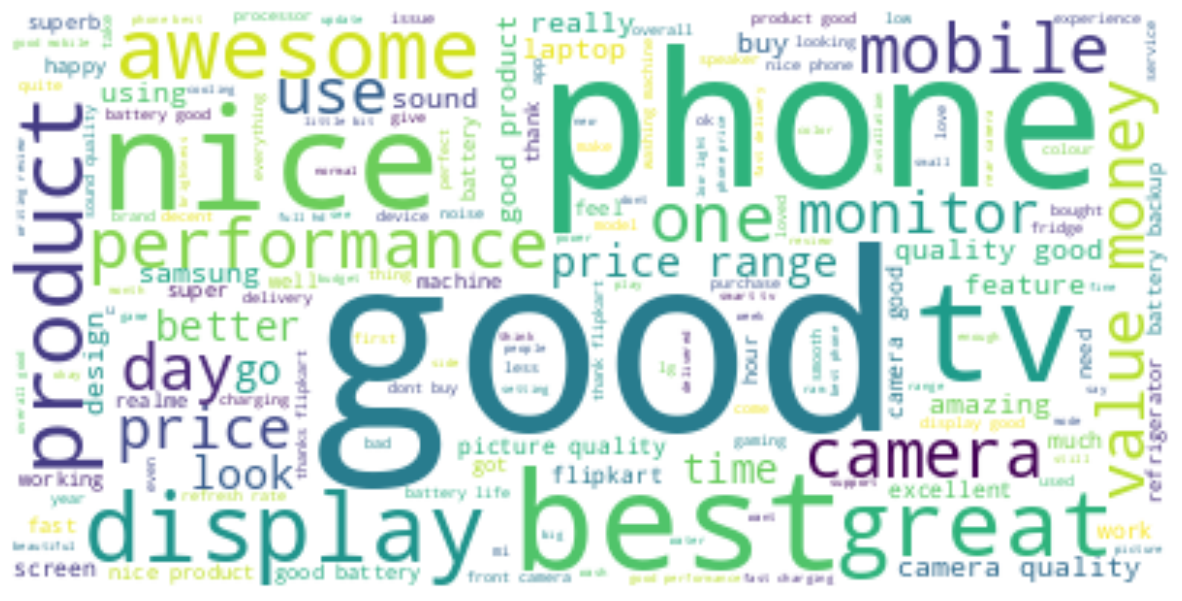

In [ ]:
text=" ".join(i for i in data.Review)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,
                    background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()
data['Positive']=[sentiments.polarity_scores(i)['pos'] for i in data['Review']]
data['Negative']=[sentiments.polarity_scores(i)['neg'] for i in data['Review']]
data['Neutral']=[sentiments.polarity_scores(i)['neu'] for i in data['Review']]
data=data[['Review','Positive','Negative','Neutral']]
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review,Positive,Negative,Neutral
0,best great performancei got around backup bi...,0.400,0.1,0.500
1,good perfomence,0.744,0.0,0.256
2,great performance usually also gaming laptops ...,0.258,0.0,0.742
3,wife happy best product 👌🏻😘,0.725,0.0,0.275
4,light weight laptop new amazing features batte...,0.530,0.0,0.470


In [ ]:
x=sum(data['Positive'])
y=sum(data['Negative'])
z=sum(data['Neutral'])

def sentiment_score(a,b,c):
  if (a>c) and (a>b):
    print("Positive 😊 ")
  elif (b>a) and (b>c):
    print("Negative 😠 ")
  else:
    print("Neutral 🙂 ")
sentiment_score(x,y,z)

Neutral 🙂 
